In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import pylab as p

%matplotlib inline

train = pd.read_csv("../input/train.csv")
train['loss'] = np.log(train['loss']+200)
#plt.rcParams['figure.figsize'] = 8, 6 #[6.0, 4.0]

In [2]:
train['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4     H
Name: cat109, dtype: object

In [3]:
def LetterRep(x,LevelList):
    if x in LevelList:
        x = '0'+x
    return x

LevelList = {'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'}
train_2 = train.applymap(lambda x: LetterRep(x,LevelList))

In [4]:
train_2['cat109'].head()

0    BU
1    BI
2    AB
3    BI
4    0H
Name: cat109, dtype: object

In [5]:
features = train.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train[feat] = pd.factorize(train[feat], sort=True)[0]

In [6]:
train.head()

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9    ...     \
0   1     0     1     0     1     0     0     0     0     1    ...      
1   2     0     1     0     0     0     0     0     0     1    ...      
2   5     0     1     0     0     1     0     0     0     1    ...      
3  10     1     1     0     1     0     0     0     0     1    ...      
4  11     0     1     0     1     0     0     0     0     1    ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14      loss  
0  0.822493  0.714843  7.788701  
1  0.611431  0.304496  7.302227  
2  0.195709  0.774425  8.072495  
3  0.605077  0.602642  7.038652  
4  0.246011  0.432606  7.994244  

[5 rows x 132 columns]

In [7]:
features = train_2.columns
cats = [feature for feature in features if feature.startswith('cat')]
for feat in cats:
    train_2[feat] = pd.factorize(train_2[feat], sort=True)[0]

In [8]:
train_2.head()

id  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9    ...     \
0   1     0     1     0     1     0     0     0     0     1    ...      
1   2     0     1     0     0     0     0     0     0     1    ...      
2   5     0     1     0     0     1     0     0     0     1    ...      
3  10     1     1     0     1     0     0     0     0     1    ...      
4  11     0     1     0     1     0     0     0     0     1    ...      

      cont6     cont7    cont8    cont9   cont10    cont11    cont12  \
0  0.718367  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646   
1  0.438917  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307   
2  0.289648  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424   
3  0.440945  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570   
4  0.178193  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213   

     cont13    cont14      loss  
0  0.822493  0.714843  7.788701  
1  0.611431  0.304496  7.302227  
2  0.195709  0.774425  8.072495  
3  0.605077  0.602642  7.038652  
4  0.246011  0.432606  7.994244  

[5 rows x 132 columns]

In [9]:
def plot_feature_loss(input_df,feature_name = 'cont1',num_bins = 50):
    if feature_name.startswith('cont'):
        bins = np.linspace(0,1.0,num_bins)
        feature_name_binned = feature_name + '_binned'
        input_df[feature_name_binned] = np.digitize(input_df[feature_name],bins=bins,right=True)
        input_df[feature_name_binned] = input_df[feature_name_binned] / num_bins
        temp_dict = input_df.groupby(feature_name_binned)['loss'].mean().to_dict()
        temp_err_dict = input_df.groupby(feature_name_binned)['loss'].sem().to_dict()
    else:
        temp_dict = input_df.groupby(feature_name)['loss'].mean().to_dict()
        temp_err_dict = input_df.groupby(feature_name)['loss'].sem().to_dict()

    lists = sorted(temp_dict.items())
    x, y = zip(*lists)
    lists_err = sorted(temp_err_dict.items())
    x_err, y_error = zip(*lists_err)

    p.figure(figsize=(15,4))
    plt.errorbar(x,y,fmt = 'o',yerr = y_error,label = feature_name)
    p.xlabel(feature_name,fontsize=20)
    p.ylabel('loss',fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    p.legend(prop={'size':20},numpoints=1,loc=(0.05,0.8))
    p.xlim([input_df[feature_name].min() - 0.02, input_df[feature_name].max() + 0.02 ])
    plt.grid()
    ax = plt.gca()

    plt.tick_params(axis='both', which='major', labelsize=15)
    ax.yaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))


In [10]:
# def plot_feature_loss(input_df,feature_name = 'cont1',num_bins = 50):
#     if feature_name.startswith('cont'):
#         bins = np.linspace(0,1.0,num_bins)
#         feature_name_binned = feature_name + '_binned'
#         input_df[feature_name_binned] = np.digitize(input_df[feature_name],bins=bins,right=True)
#         input_df[feature_name_binned] = input_df[feature_name_binned] / num_bins
#         temp_dict = input_df.groupby(feature_name_binned)['loss'].mean().to_dict()
#         temp_err_dict = input_df.groupby(feature_name_binned)['loss'].std().to_dict()
#     else:
#         temp_dict = input_df.groupby(feature_name)['loss'].mean().to_dict()
#         temp_err_dict = input_df.groupby(feature_name)['loss'].std().to_dict()

#     lists = sorted(temp_dict.items())
#     x, y = zip(*lists)
#     lists_err = sorted(temp_err_dict.items())
#     x_err, y_error = zip(*lists_err)

#     p.figure()
#     plt.errorbar(x,y,fmt = 'o',yerr = y_error,label = feature_name)
#     p.xlabel(feature_name,fontsize=20)
#     p.ylabel('loss',fontsize=20)
#     plt.tick_params(axis='both', which='major', labelsize=15)
#     p.legend(prop={'size':20},numpoints=1,loc=(0.05,0.8))
#     p.xlim([input_df[feature_name].min() - 0.02, input_df[feature_name].max() + 0.02 ])
#     plt.grid()
#     ax = plt.gca()

#     plt.tick_params(axis='both', which='major', labelsize=15)
#     ax.yaxis.set_major_locator(MaxNLocator(prune='lower'))
#     ax.xaxis.set_major_locator(MaxNLocator(prune='lower'))
#     ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))


### original features

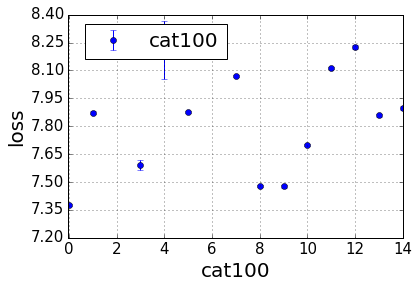

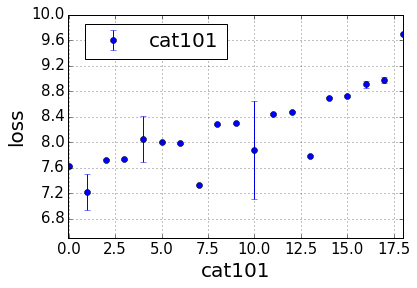

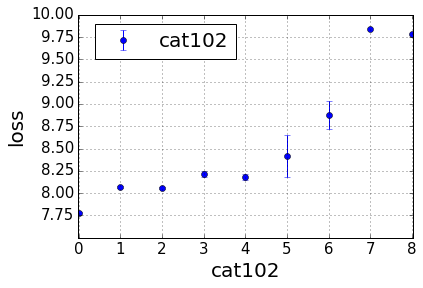

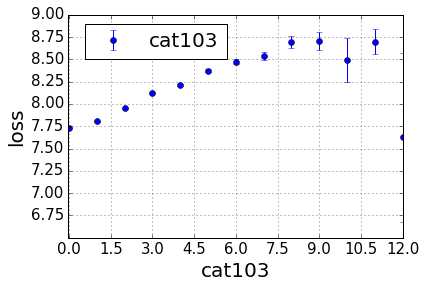

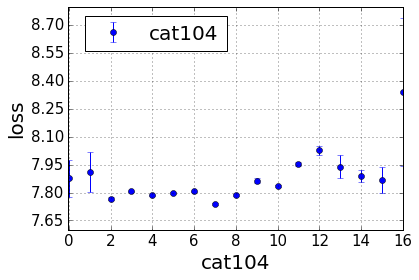

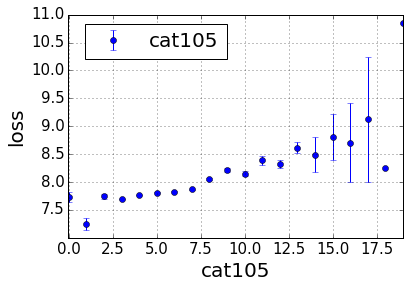

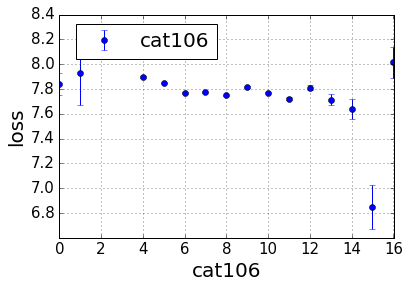

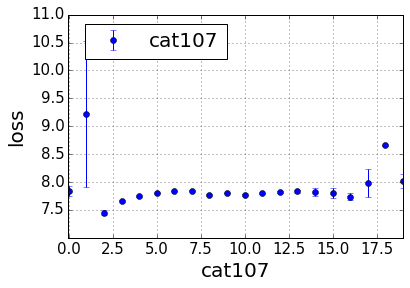

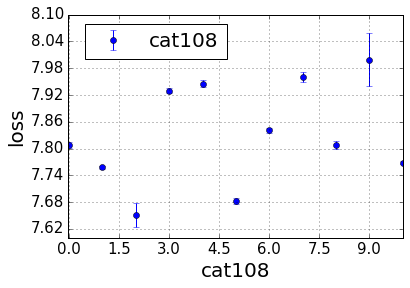

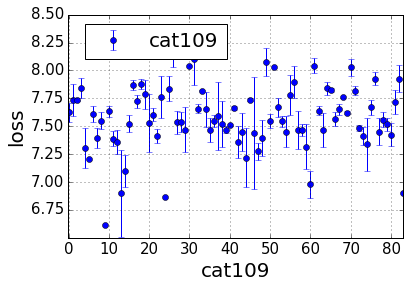

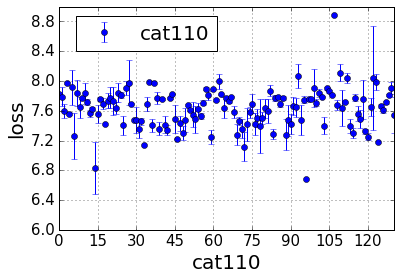

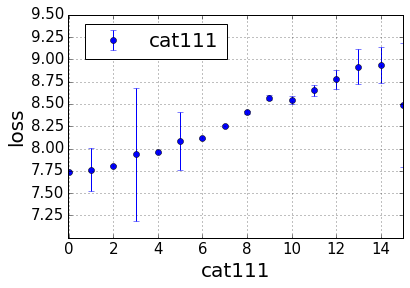

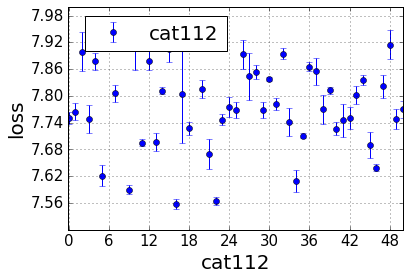

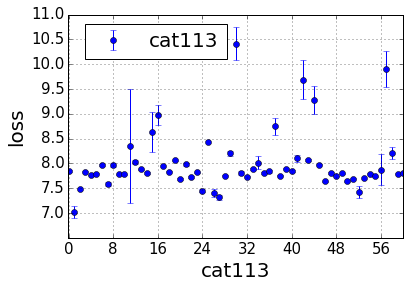

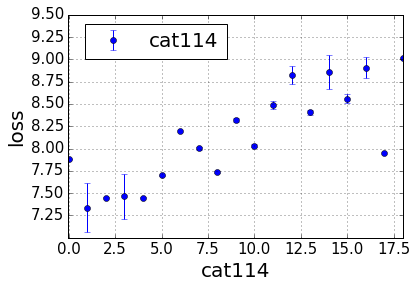

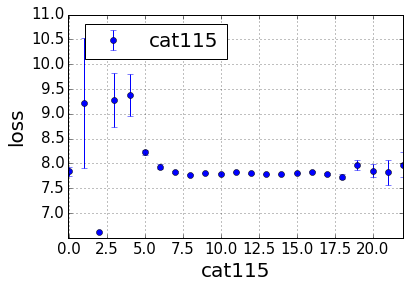

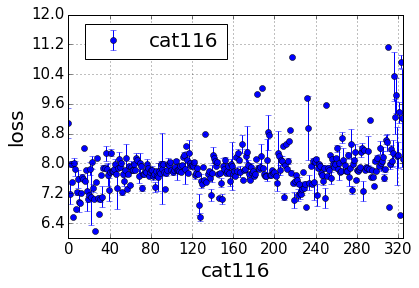

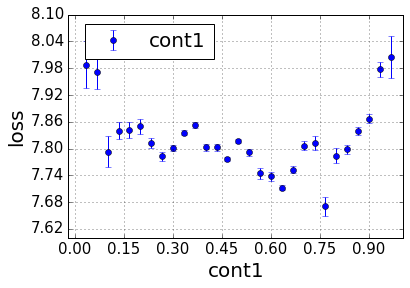

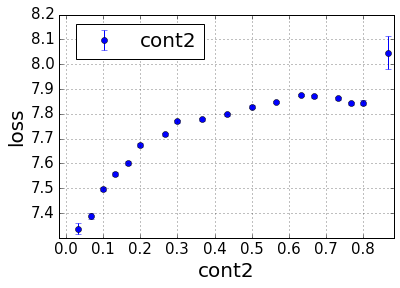

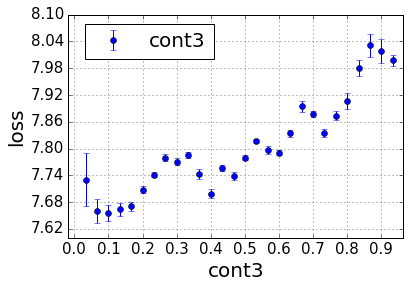

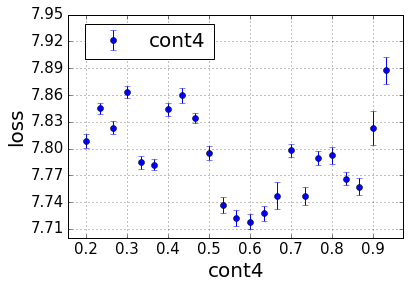

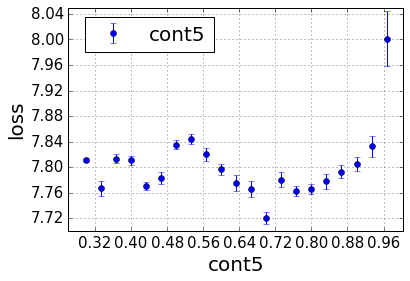

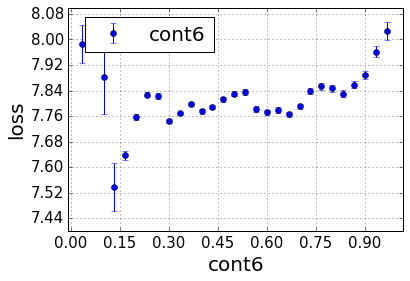

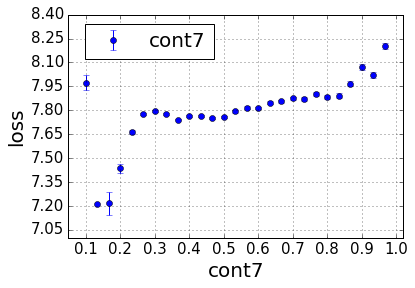

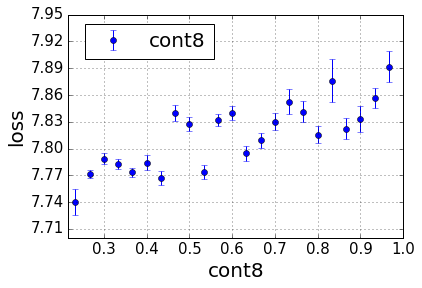

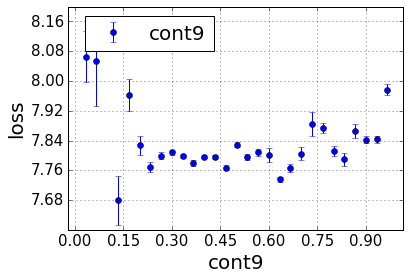

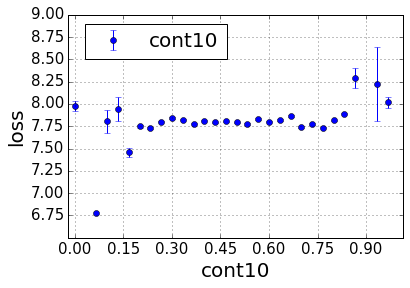

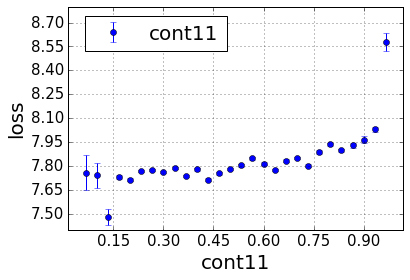

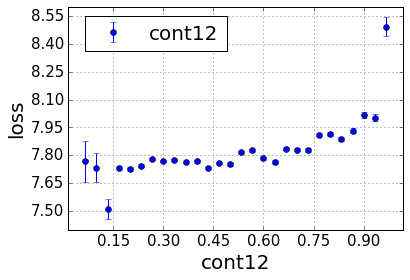

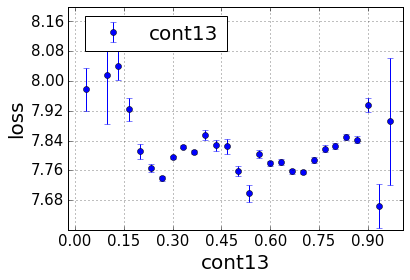

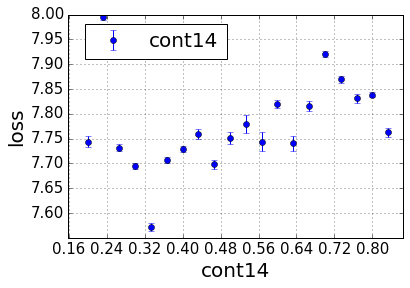

In [11]:
for name in train.columns:
    if name.startswith('cont'):
        plot_feature_loss(train,feature_name = name,num_bins=30)
    if name.startswith('cat'):
        #limit number of pics made because of script limit on output files
        if int(name[3:]) >= 100: 
            plot_feature_loss(train,feature_name = name)

### sorted features

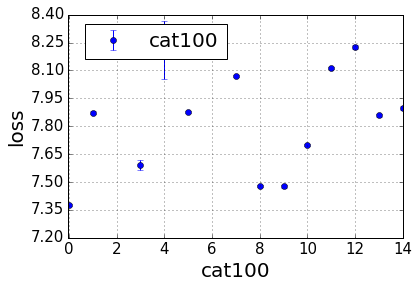

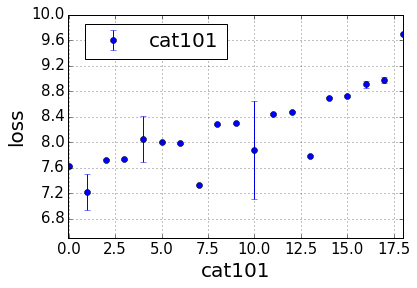

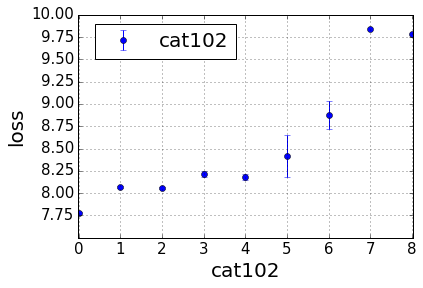

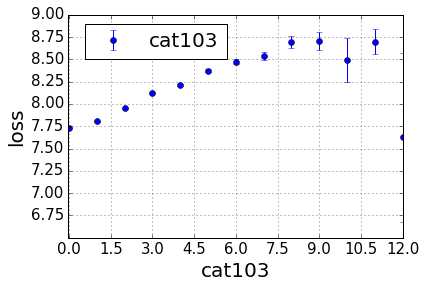

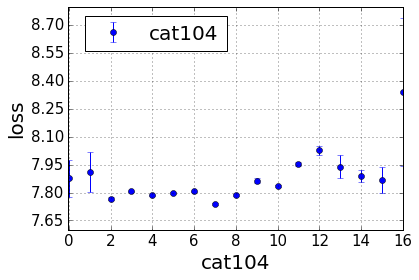

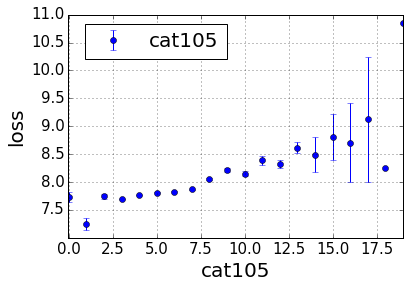

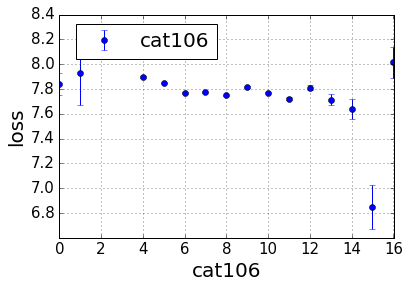

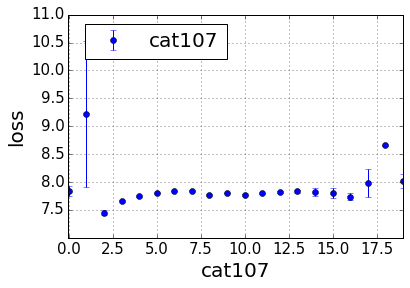

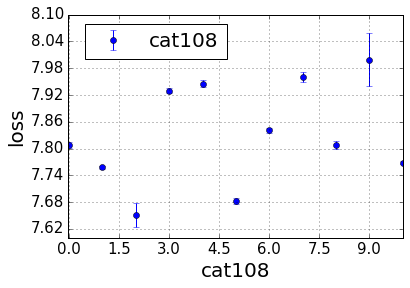

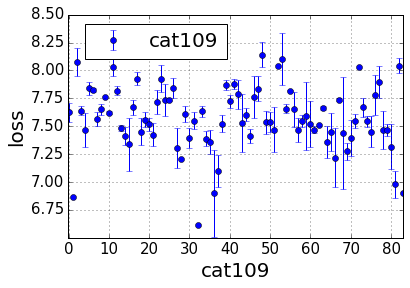

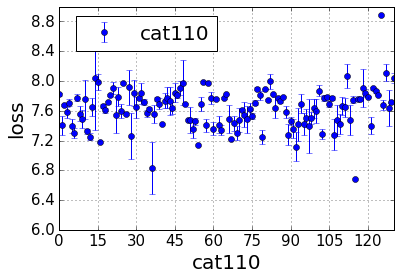

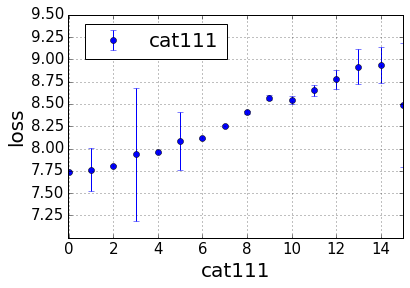

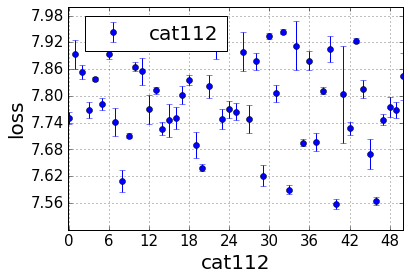

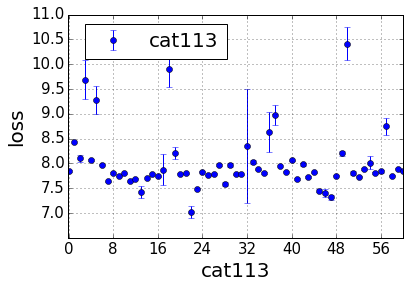

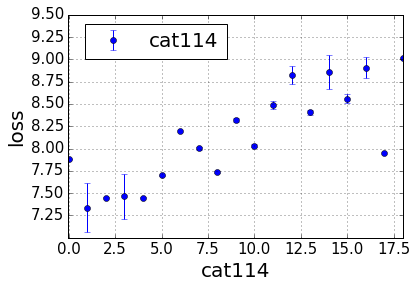

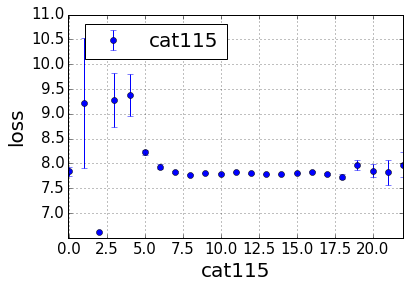

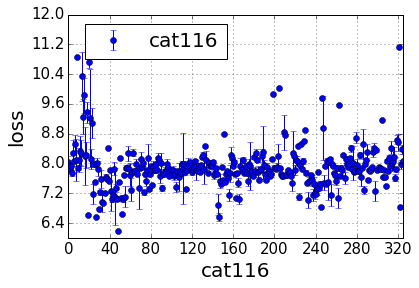

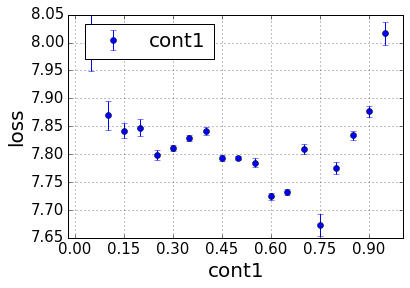

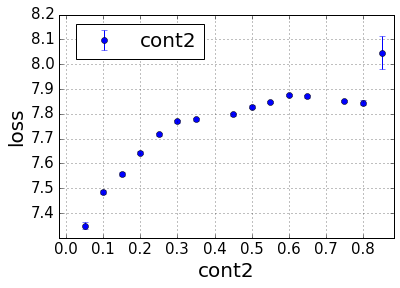

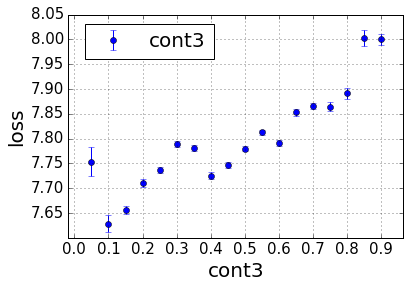

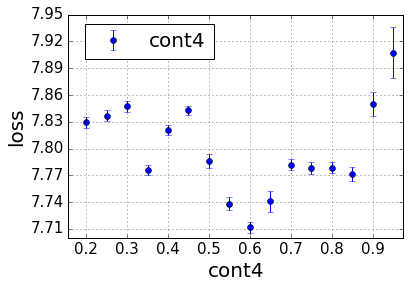

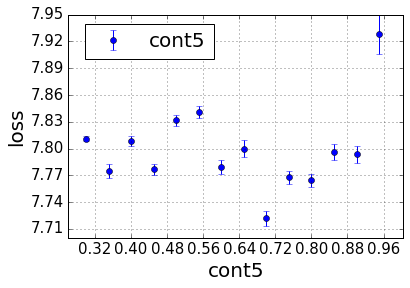

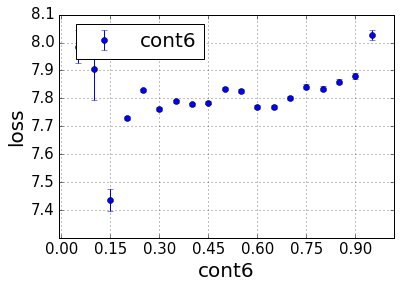

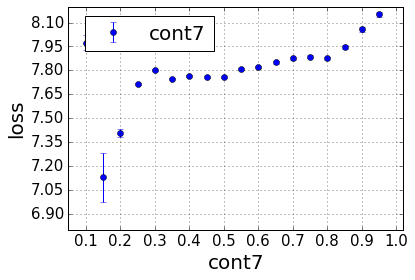

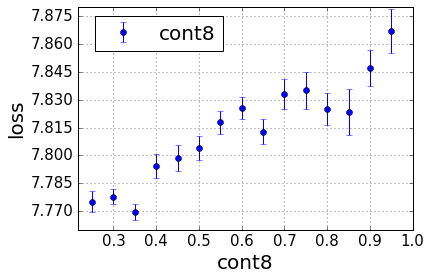

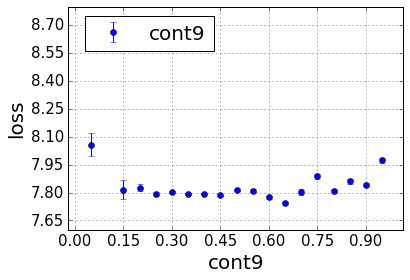

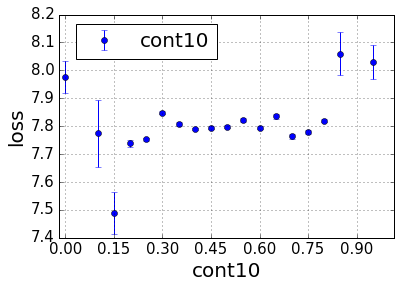

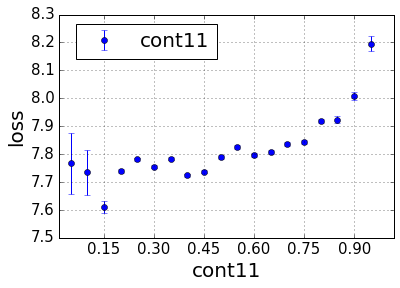

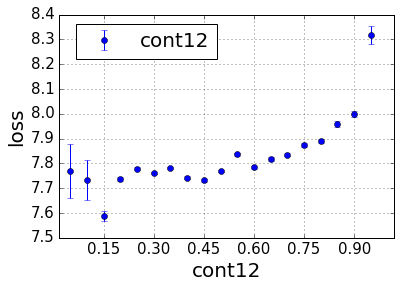

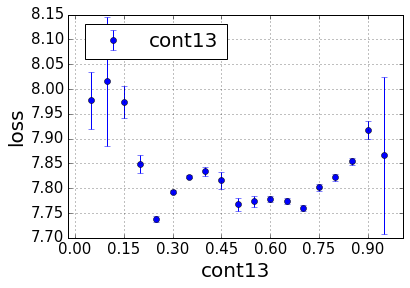

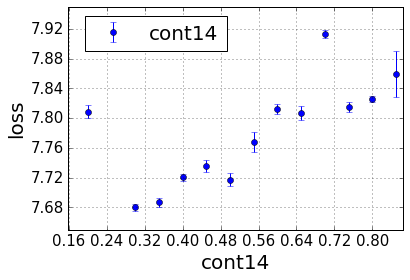

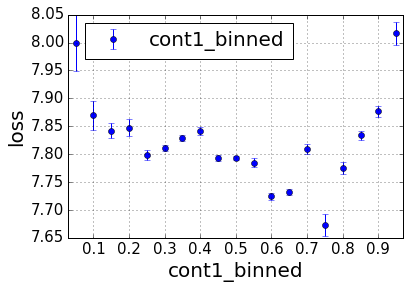

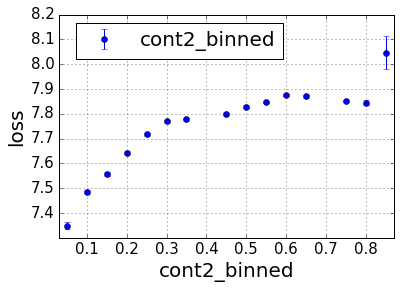

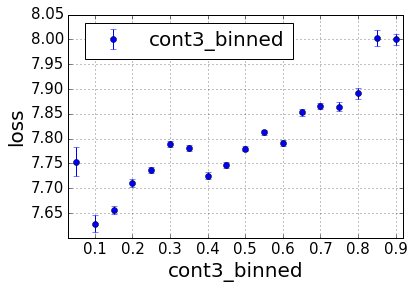

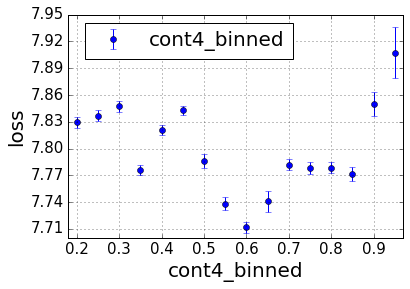

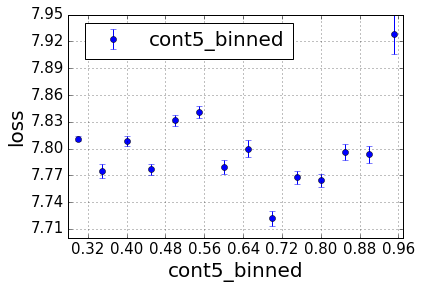

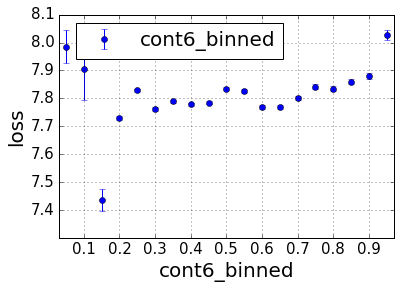

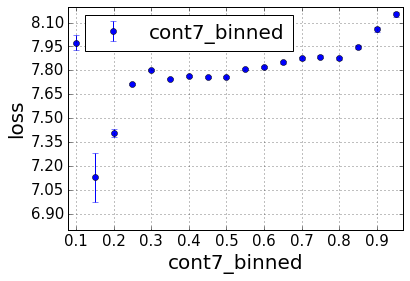

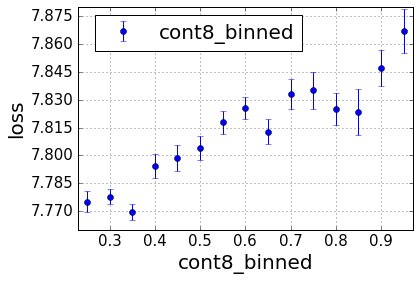

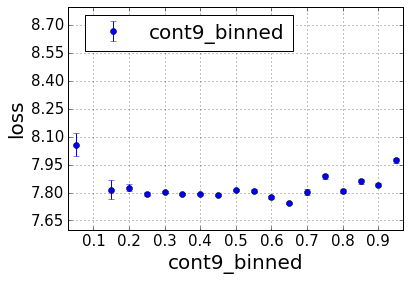

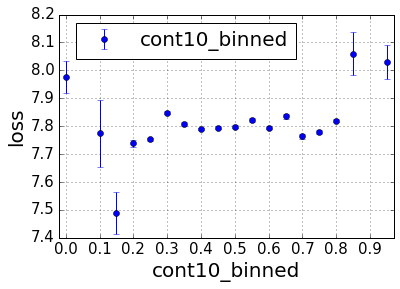

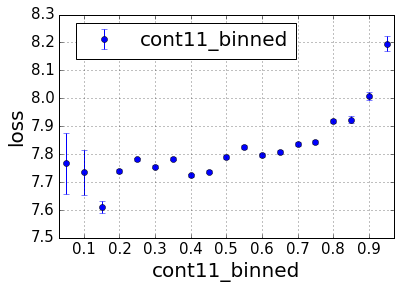

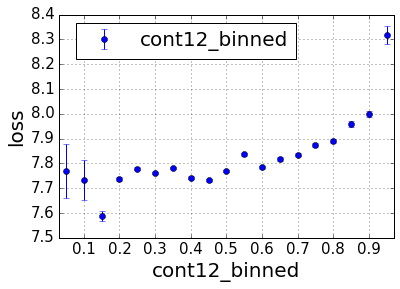

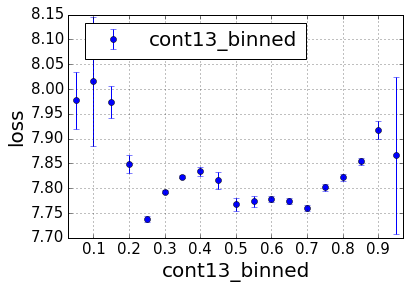

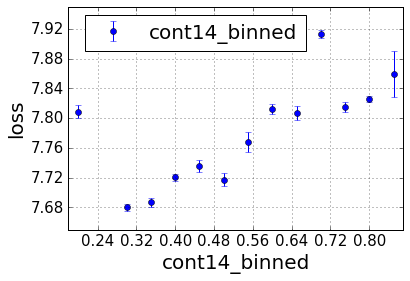

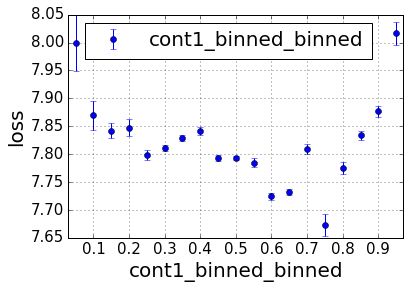

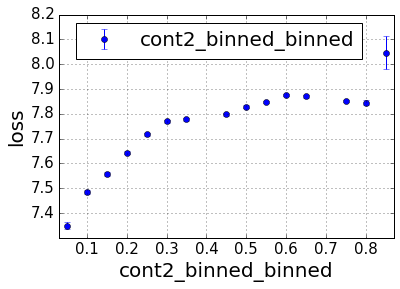

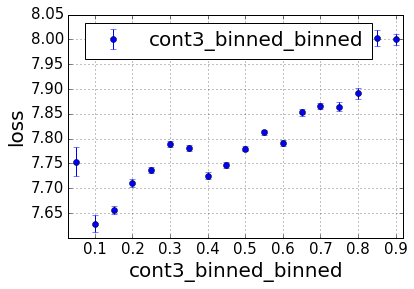

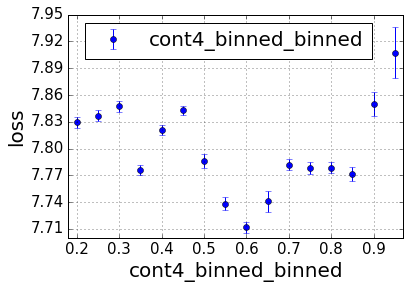

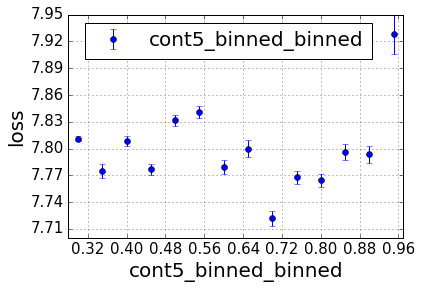

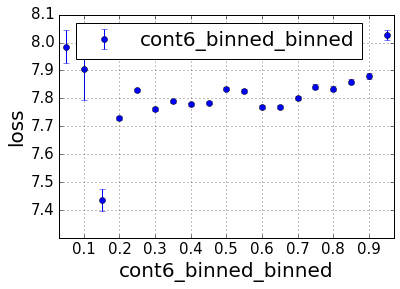

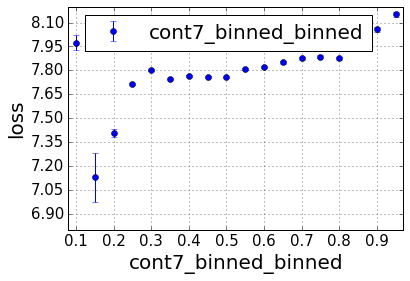

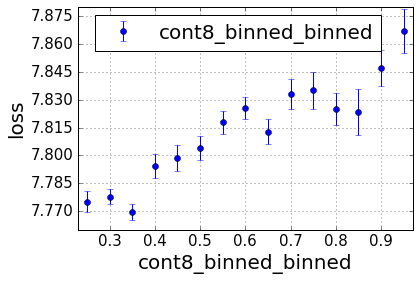

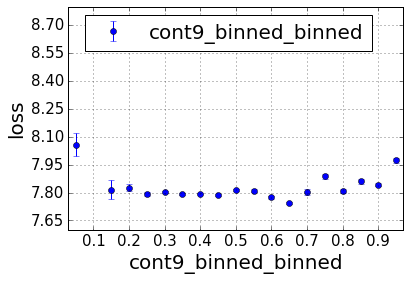

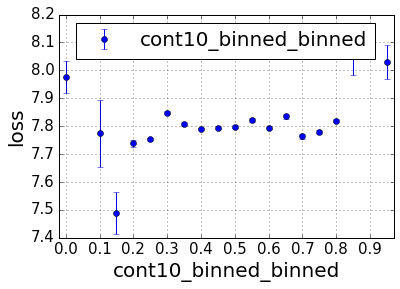

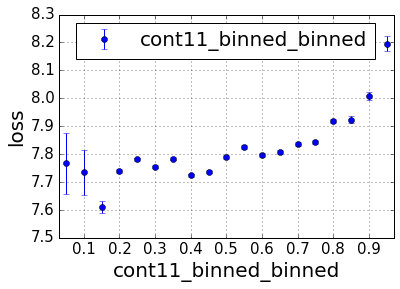

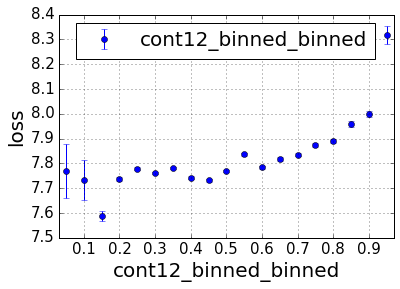

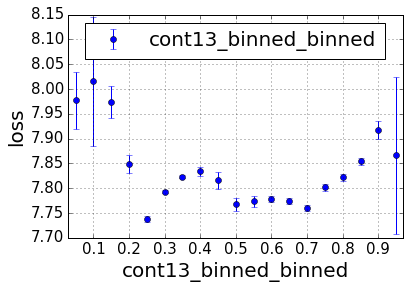

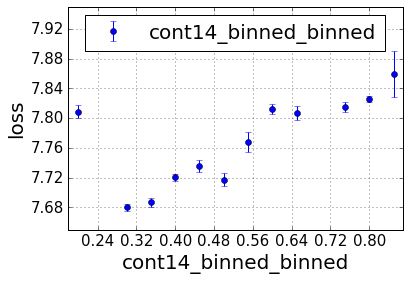

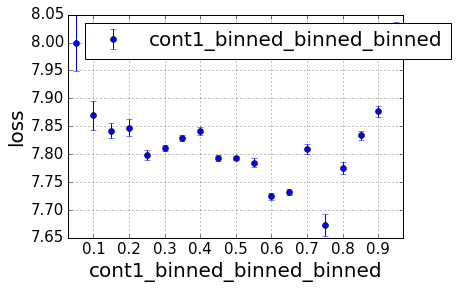

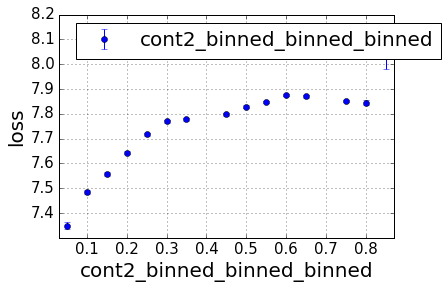

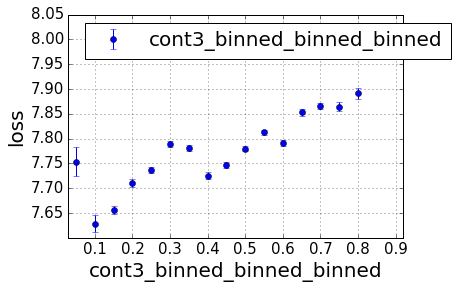

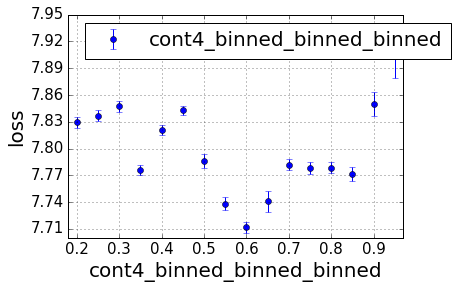

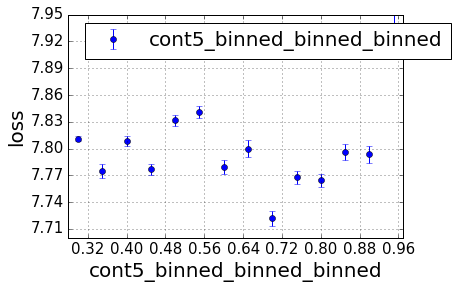

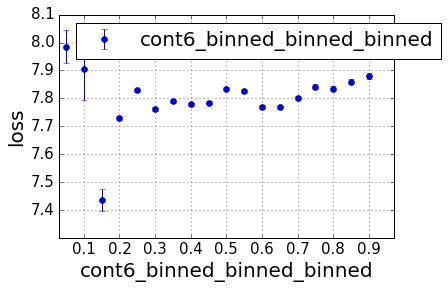

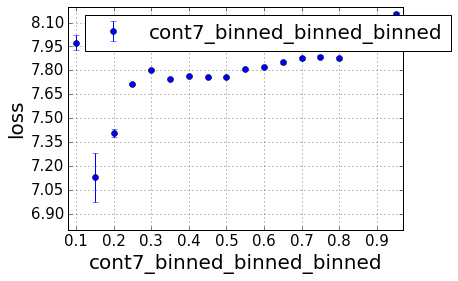

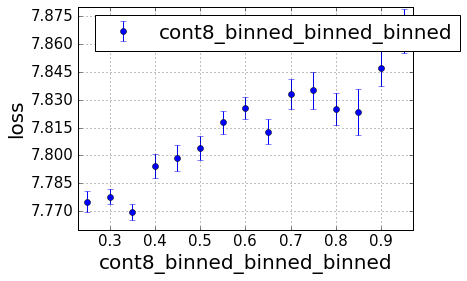

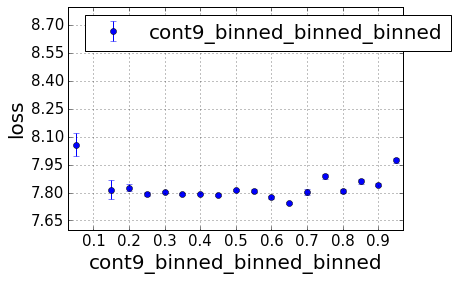

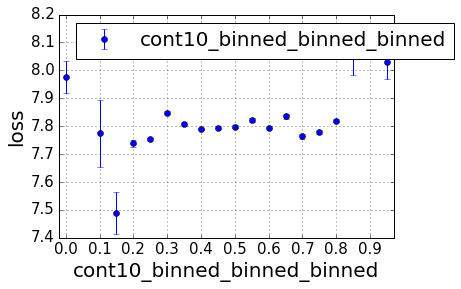

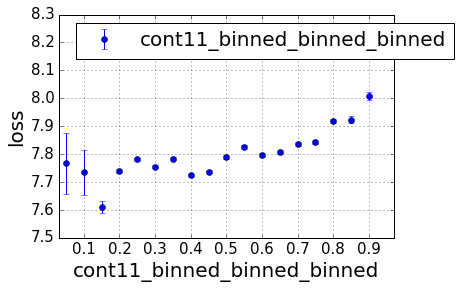

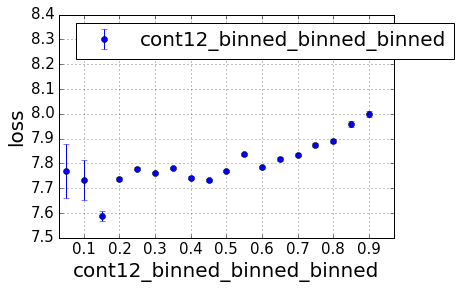

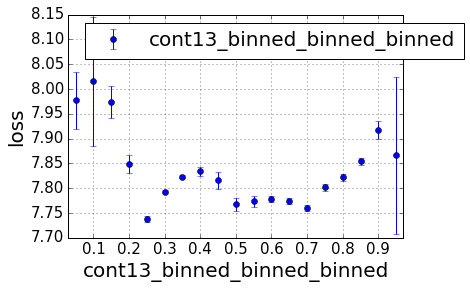

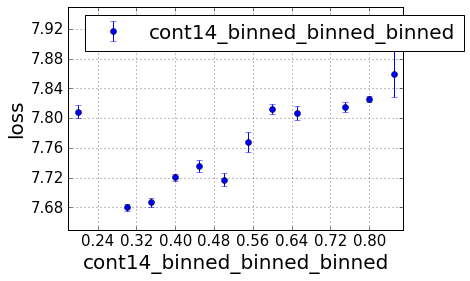

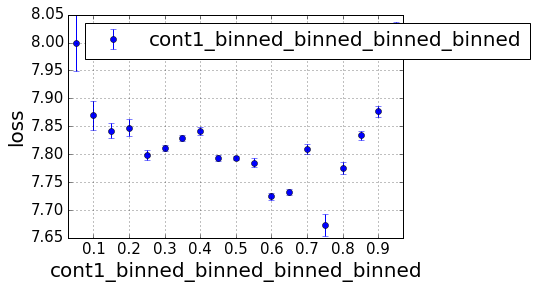

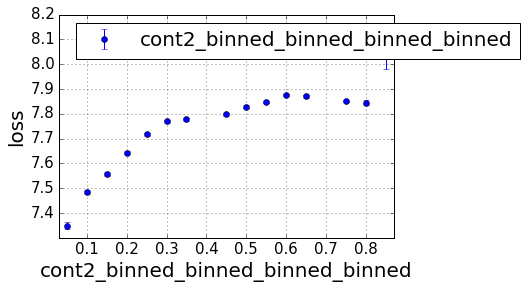

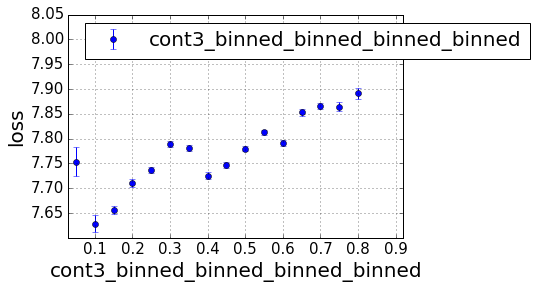

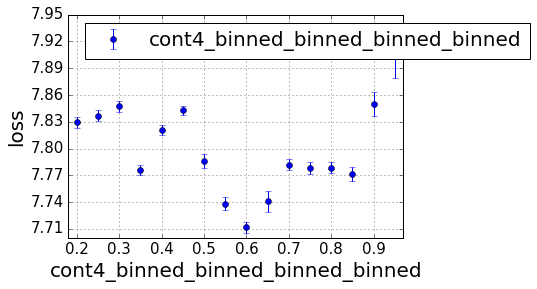

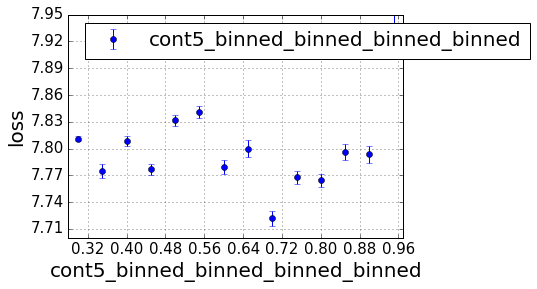

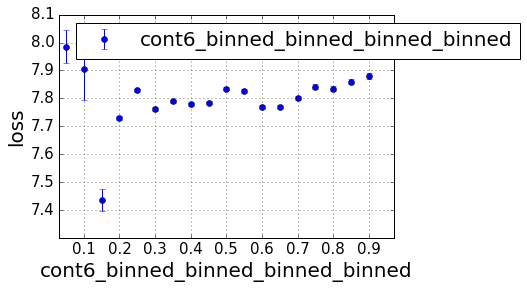

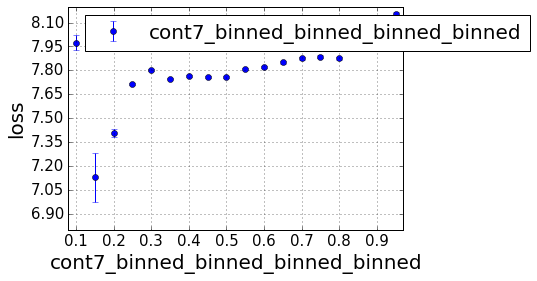

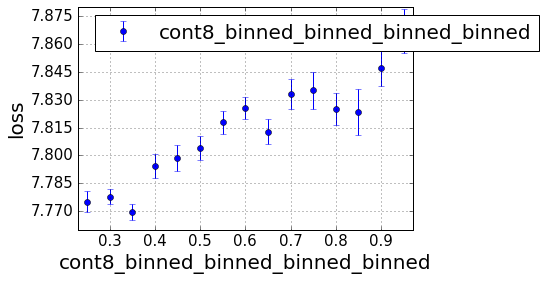

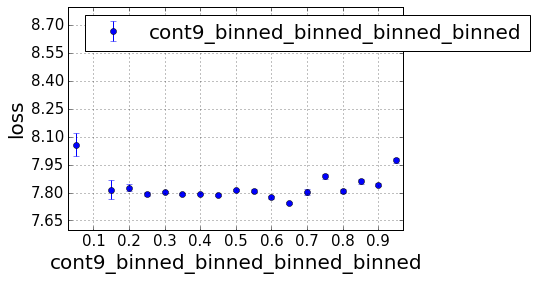

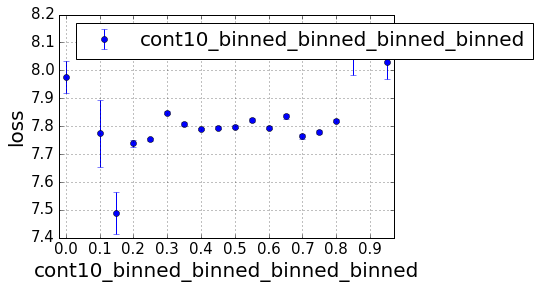

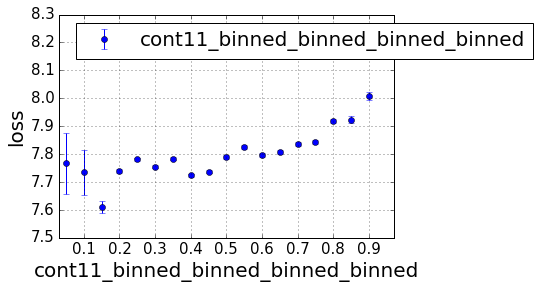

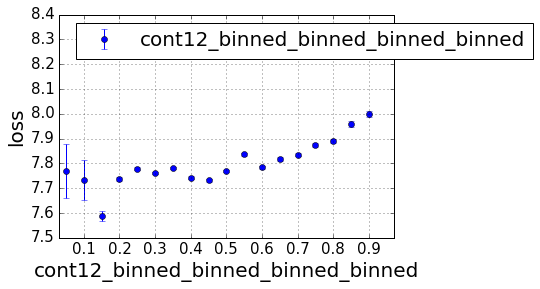

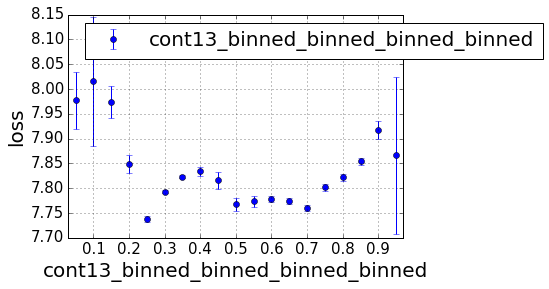

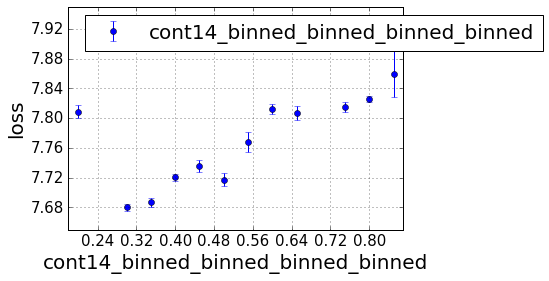

In [16]:
for name in train_2.columns:
    if name.startswith('cont'):
        plot_feature_loss(train_2,feature_name = name,num_bins=20)
    if name.startswith('cat'):
        #limit number of pics made because of script limit on output files
        if int(name[3:]) >= 100: 
            plot_feature_loss(train_2,feature_name = name)

### xgb important features - original order

In [13]:
xgb_features = [130,100,123,112,124,118,101,122,120,113, \
                121,110,117,119,129,114,126,125,127,103,111,91]
train.columns[xgb_features]

Index([u'cont14', u'cat100', u'cont7', u'cat112', u'cont8', u'cont2',
       u'cat101', u'cont6', u'cont4', u'cat113', u'cont5', u'cat110', u'cont1',
       u'cont3', u'cont13', u'cat114', u'cont10', u'cont9', u'cont11',
       u'cat103', u'cat111', u'cat91'],
      dtype='object')

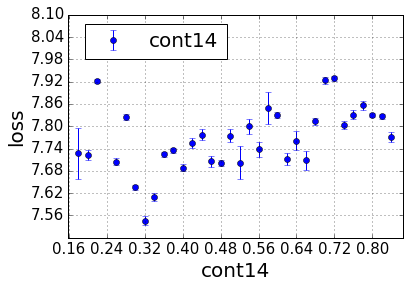

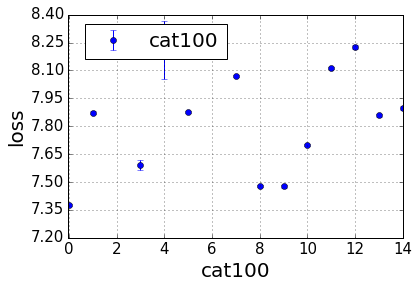

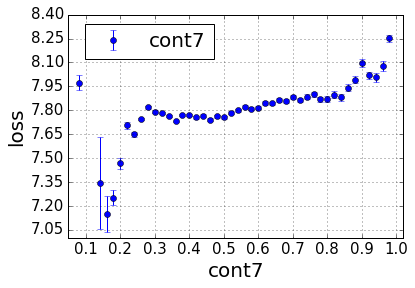

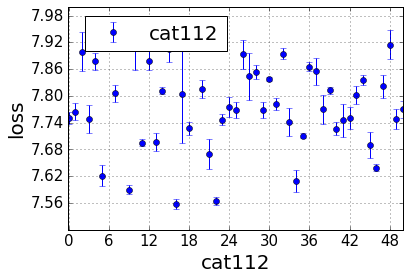

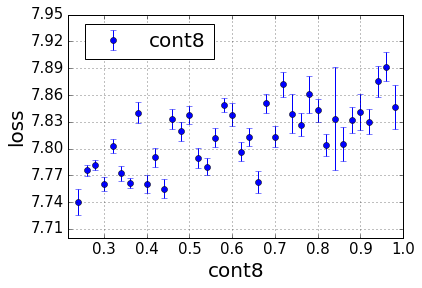

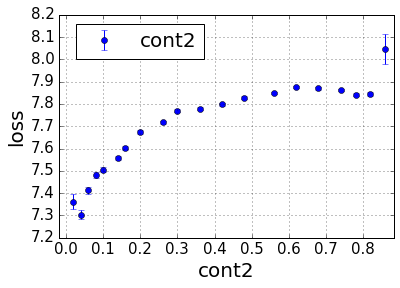

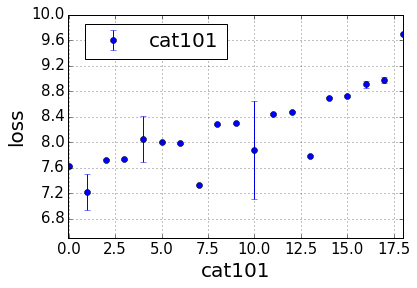

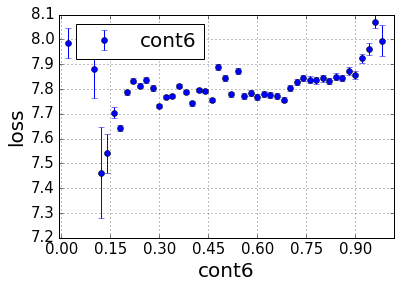

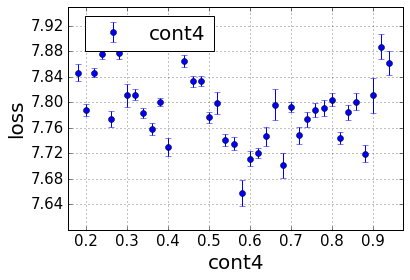

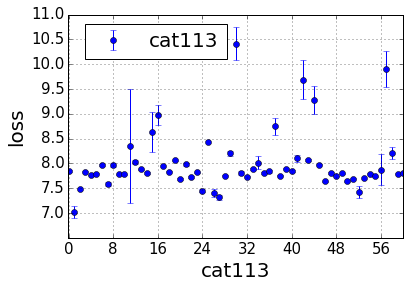

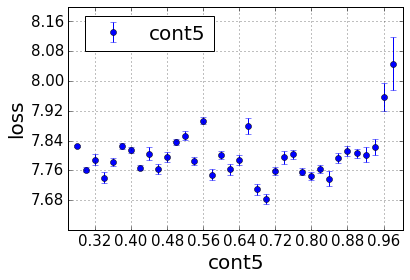

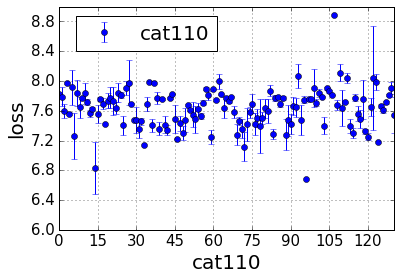

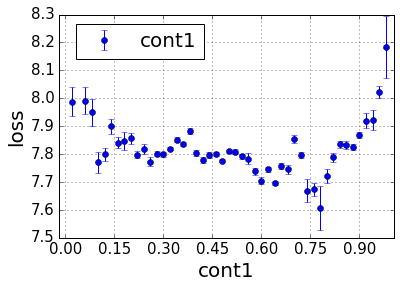

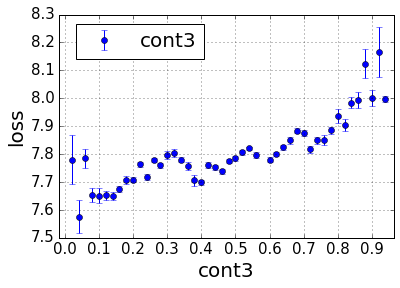

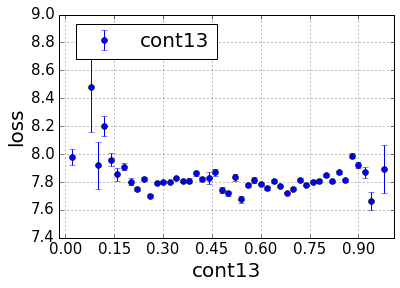

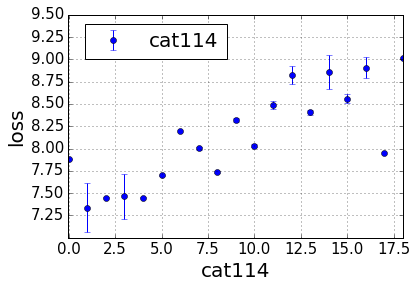

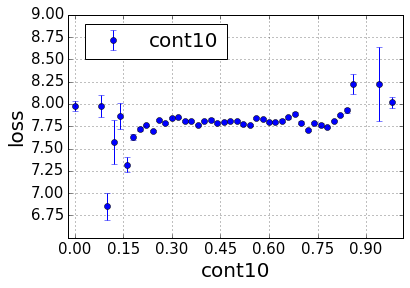

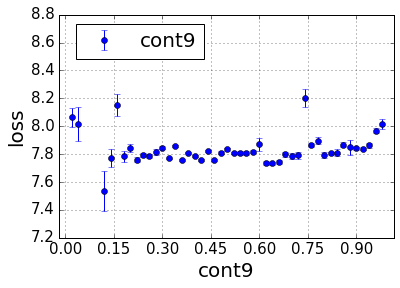

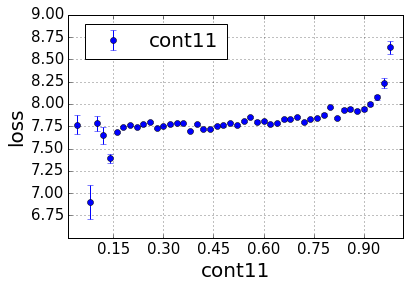

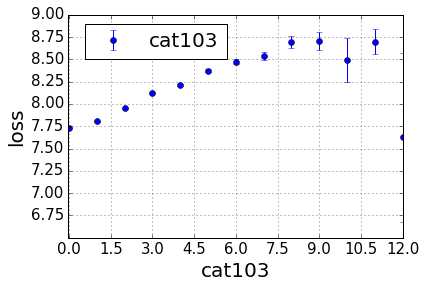

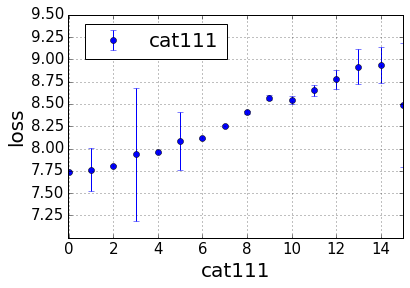

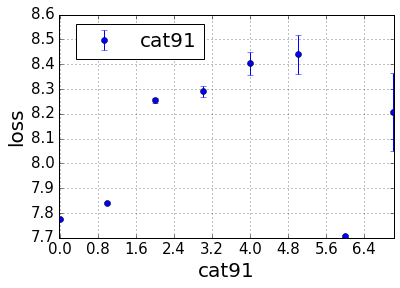

In [14]:
for name in train.columns[xgb_features]:
        plot_feature_loss(train,feature_name = name)

### xgb important features - new order

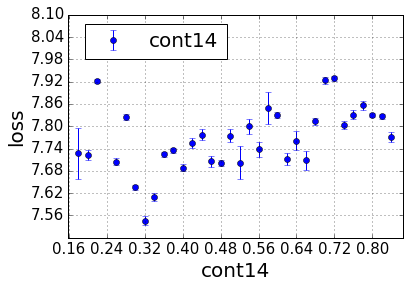

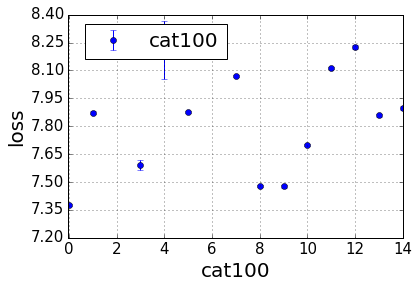

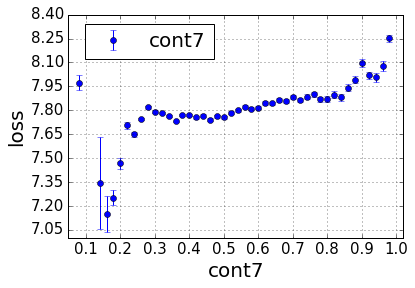

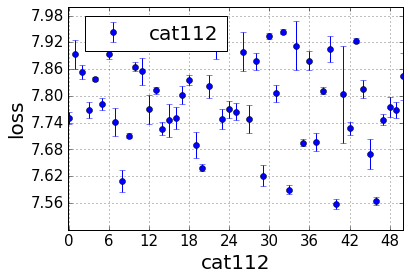

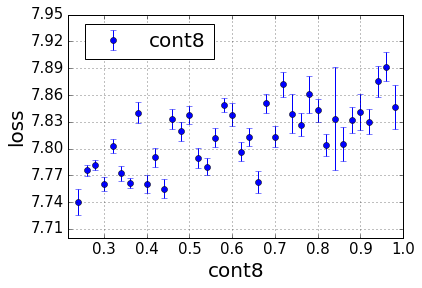

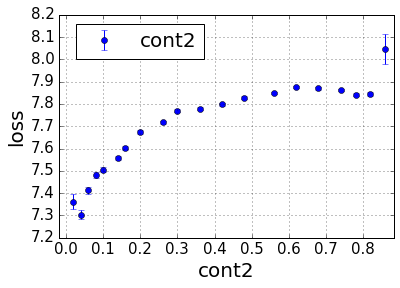

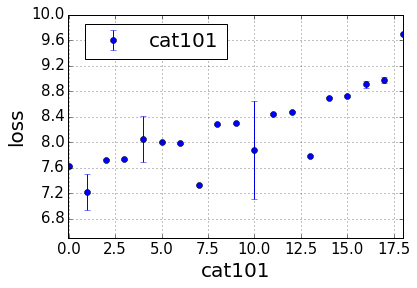

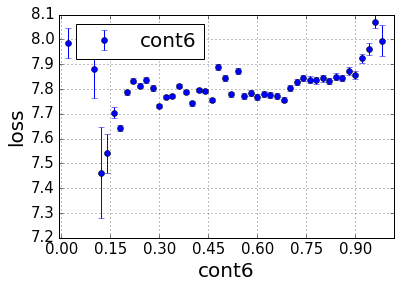

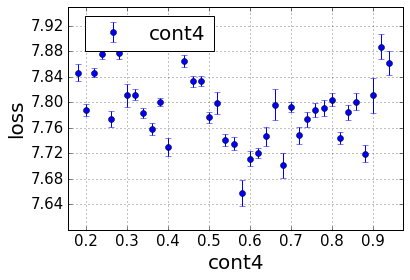

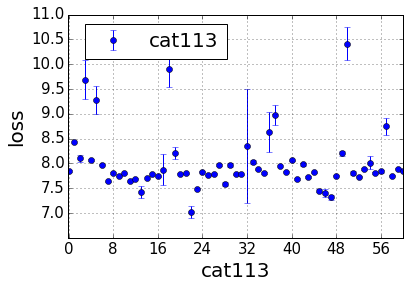

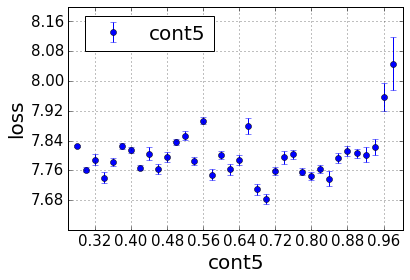

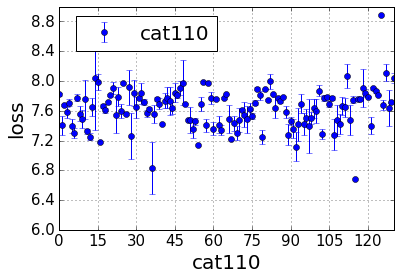

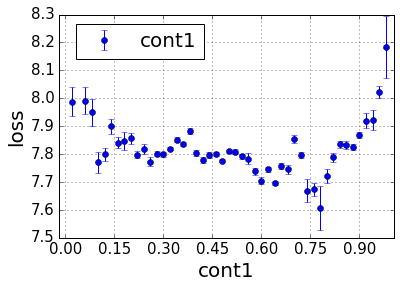

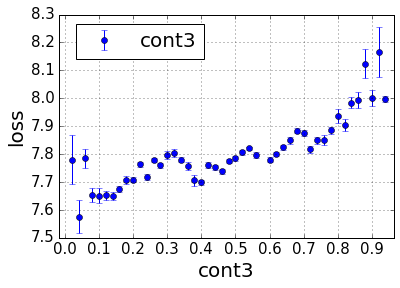

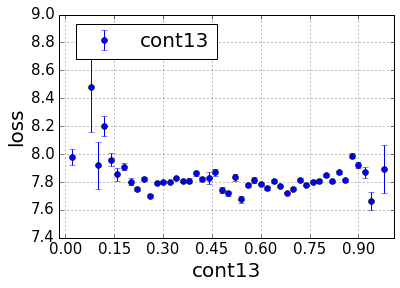

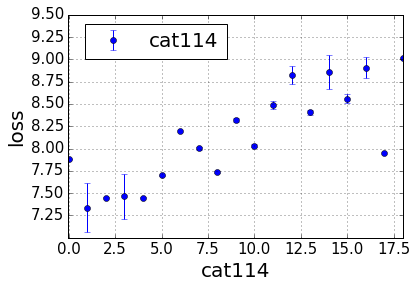

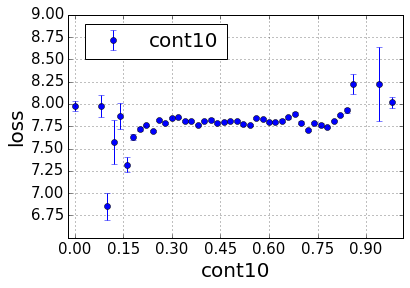

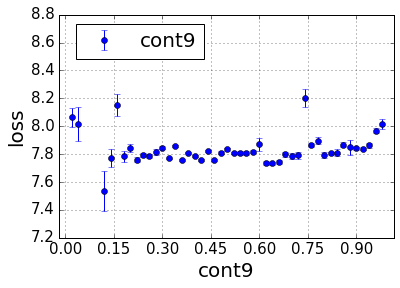

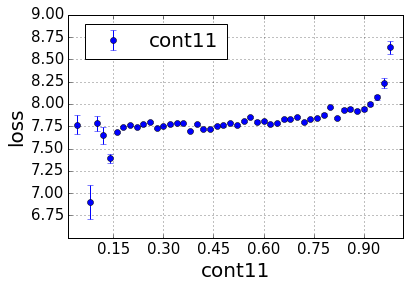

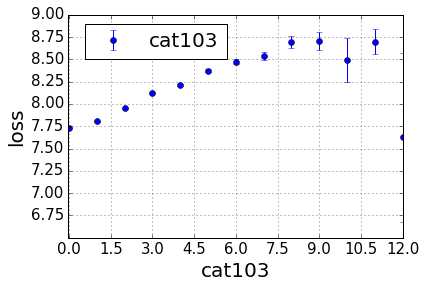

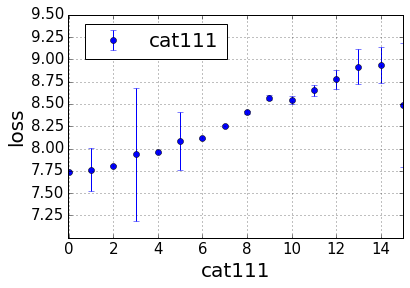

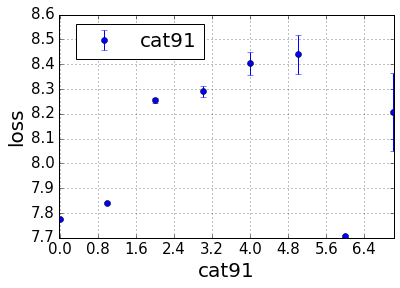

In [15]:
for name in train_2.columns[xgb_features]:
        plot_feature_loss(train_2,feature_name = name)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
count    26.000000
mean      8.207947
std       0.796467
min       6.407045
25%       7.684467
50%       8.226466
75%       8.641138
max      10.254991
Name: loss, dtype: float64
count    553.000000
mean       7.591361
std        0.640491
min        5.881650
25%        7.164426
50%        7.572004
75%        7.984361
max        9.759932
Name: loss, dtype: float64


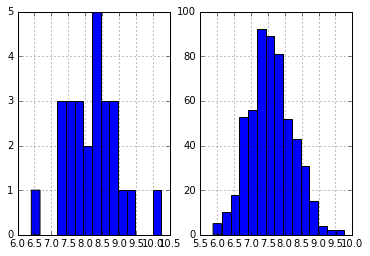

In [32]:
print(np.sort(train_2['cat100'].unique()))
plt.figure()
plt.subplot(1,2,1)
train_2[train_2['cat100']==4]['loss'].hist(bins=15)
plt.subplot(1,2,2)
train_2[train_2['cat100']==3]['loss'].hist(bins=15)

print(train_2[train_2['cat100']==4]['loss'].describe())
print(train_2[train_2['cat100']==3]['loss'].describe())

### cat73-cat116 

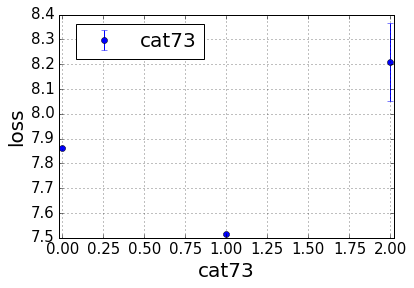

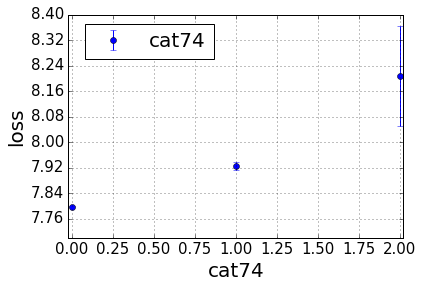

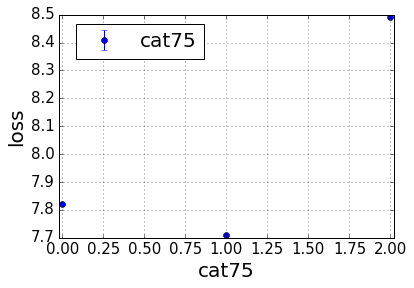

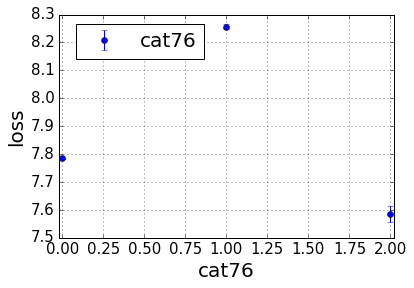

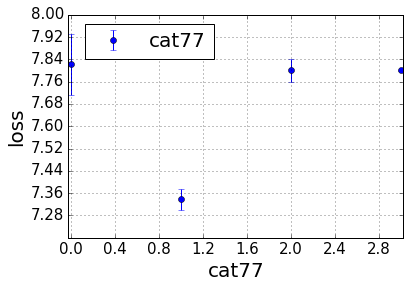

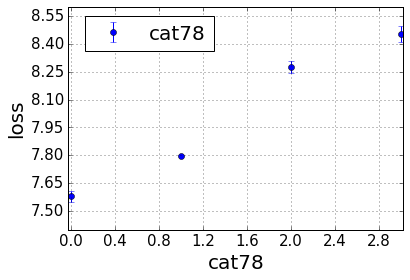

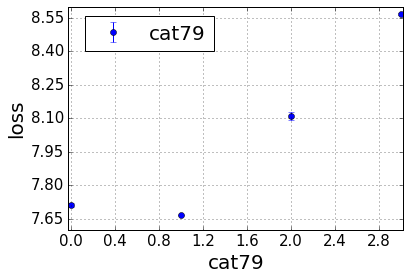

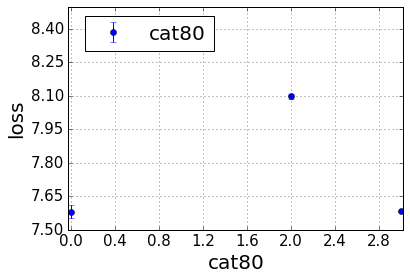

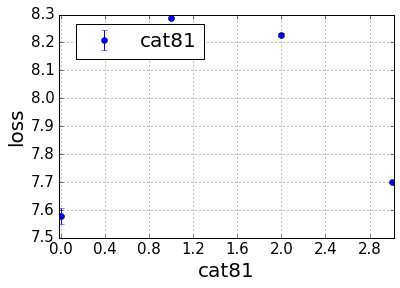

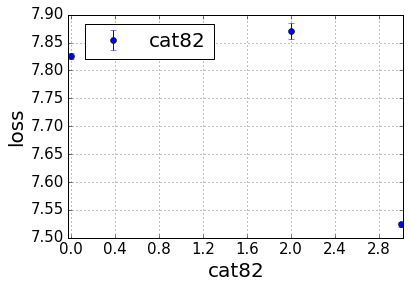

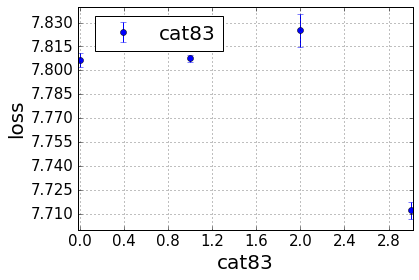

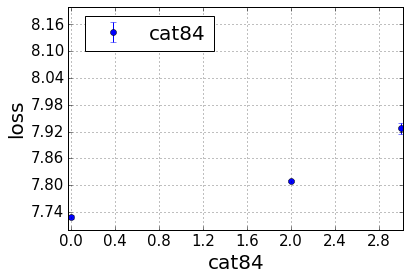

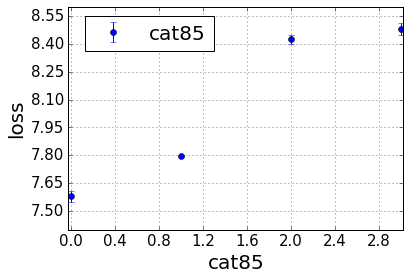

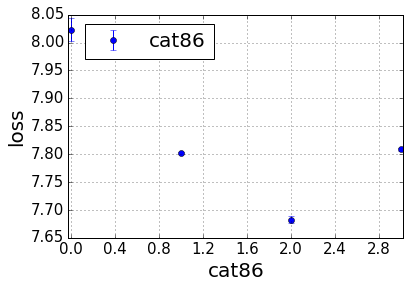

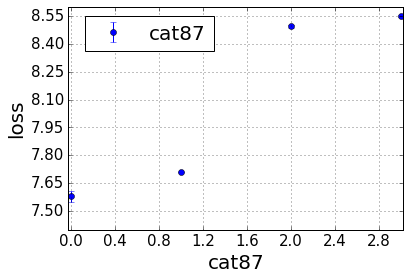

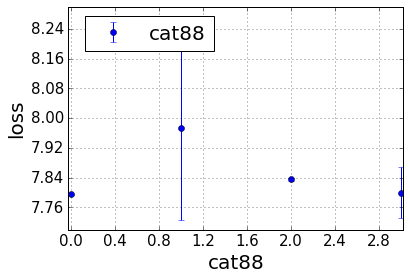

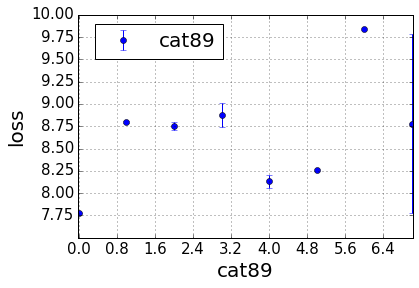

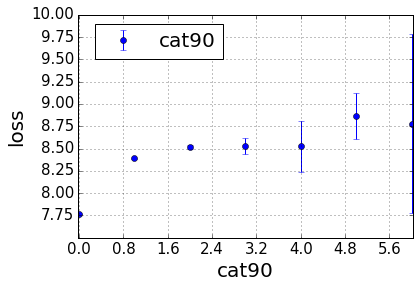

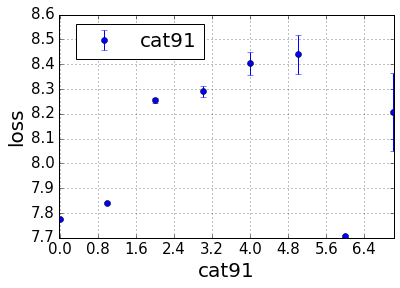

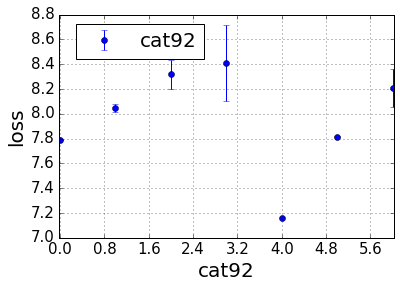

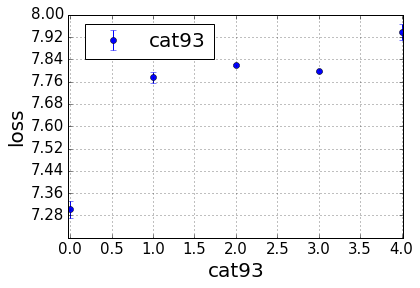

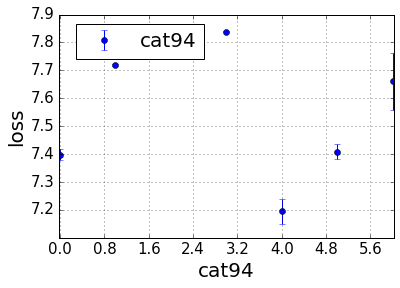

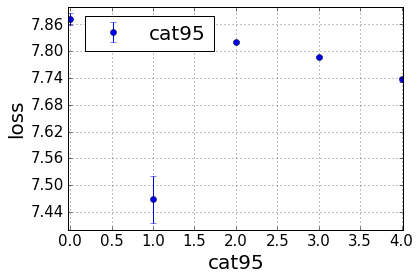

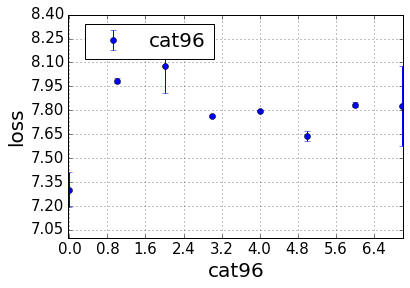

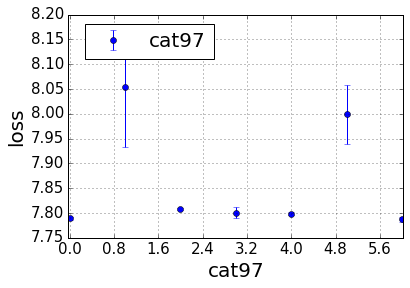

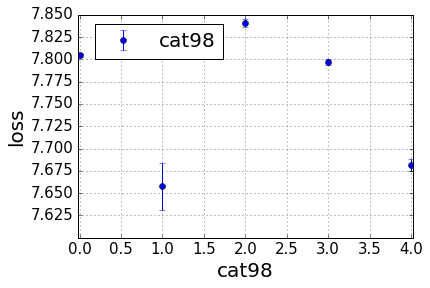

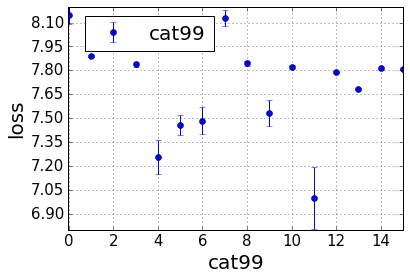

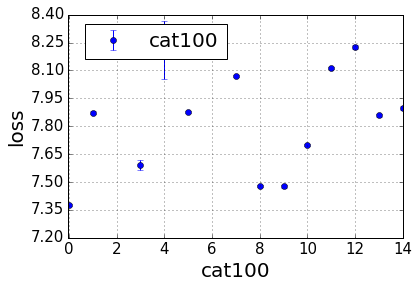

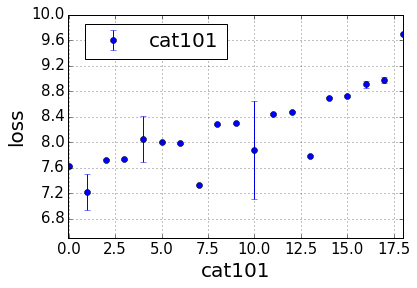

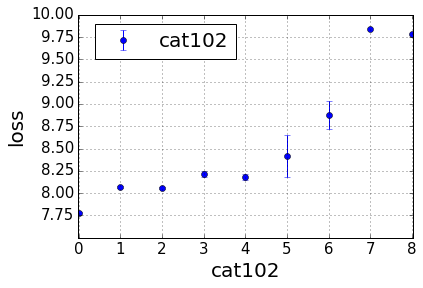

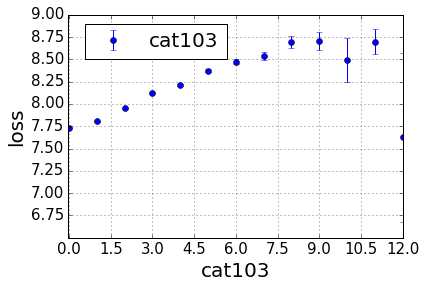

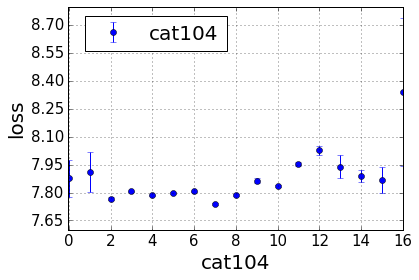

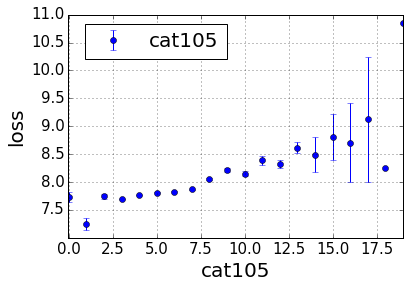

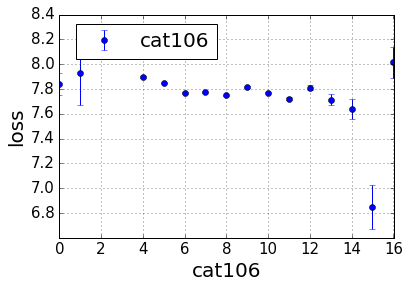

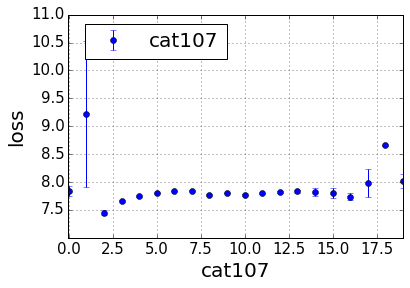

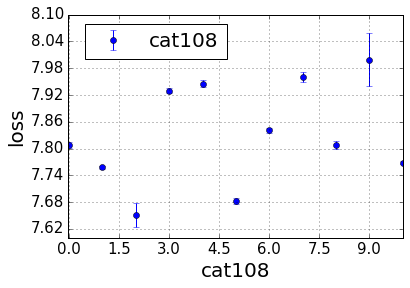

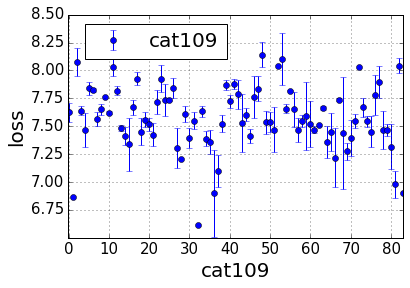

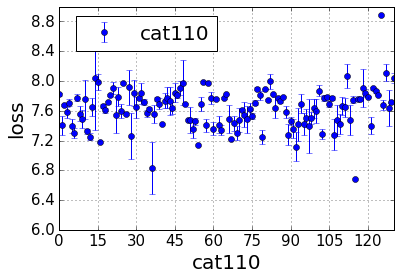

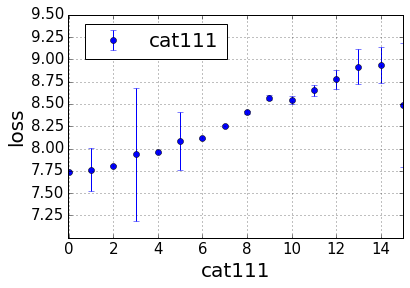

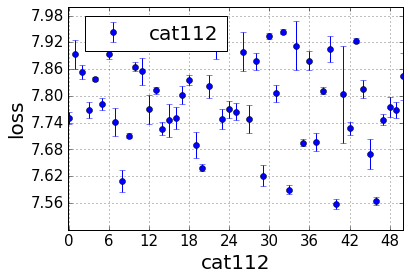

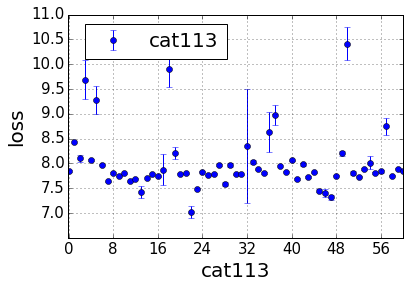

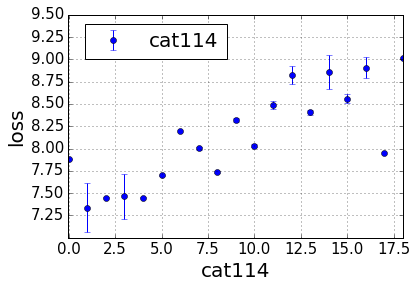

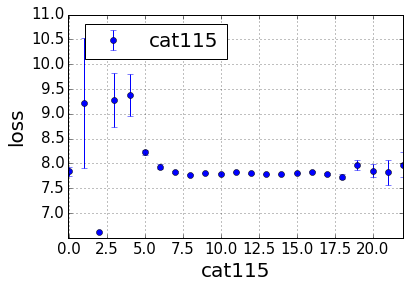

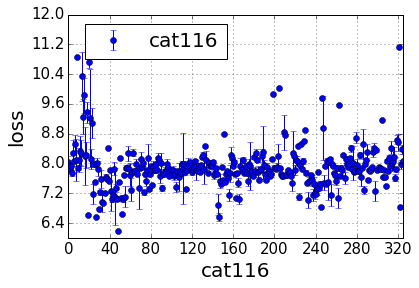

In [16]:
for name in train_2.columns[73:117]:
        plot_feature_loss(train_2,feature_name = name)